<h1><center>Análisis de Datos Práctico Utilizando Python</center></h1>
<h3><center>Control 2 - IMA539.</center></h3>
<center>W. Gómez, C. Calfucoy, J. Ruíz</center>
<center>Departamento de Ingeniería Matemática</center>
<center>Septiembre 25, 2024.</center>



### Descripción del Dataset:
El dataset proviene de una compañía global de finanzas que ha recolectado información relacionada con el historial crediticio de sus clientes. A través de este dataset, se busca clasificar a las personas en diferentes niveles de puntaje crediticio: `Poor`, `Standard` y `Good`.

### Atributos:
0. ``ID``: Identificación única de un dato.
1. ``Customer_ID``: Identificación única de una persona.
2. ``Month``: Mes del año en que se registró la información.
3. ``Name``: Nombre de la persona.
4. ``Age``: Edad de la persona.
5. ``SSN``: Número de seguro social de la persona.
6. ``Occupation``: Ocupación de la persona.
7. ``Annual_Income``: Ingreso anual de la persona.
8. ``Monthly_Inhand_Salary``: Salario base mensual de la persona.
9. ``Num_Bank_Accounts``: Cantidad de cuentas bancarias que tiene la persona.
10. ``Num_Credit_Card``: Cantidad de otras tarjetas de crédito que tiene la persona.
11. ``Interest_Rate``: Tasa de interés de la tarjeta de crédito.
12. ``Num_of_Loan``: Cantidad de préstamos tomados del banco.
13. ``Type_of_Loan``: Tipos de préstamos tomados por la persona.
14. ``Delay_from_due_date``: Días promedios de retraso en los pagos.
15. ``Num_of_Delayed_Payment``: Número de pagos retrasados.
16. ``Changed_Credit_Limit``: Cambio porcentual en el límite de la tarjeta de crédito.
17. ``Num_Credit_Inquiries``: Número de consultas de tarjetas de crédito.
18. ``Credit_Mix``: Clasificación de la combinación de créditos.
19. ``Outstanding_Debt``: Deuda restante a pagar (en USD).
20. ``Credit_Utilization_Ratio``: Índice de utilización de la tarjeta de crédito.
21. ``Credit_History_Age``: Antigüedad del historial crediticio de la persona.
22. ``Payment_of_Min_Amount``: La persona solo pagó el monto mínimo.
23. ``Total_EMI_per_month``: Pagos mensuales de EMI (en USD).
24. ``Amount_invested_monthly``: Monto mensual invertido por el cliente (en USD).
25. ``Payment_Behaviour``: Comportamiento de pago del cliente (en USD).
26. ``Monthly_Balance``: Monto del saldo mensual del cliente (en USD).
27. ``Credit_Score``: Nivel de calificación crediticia (Poor, Standard, Good).



# Preguntas

1. (0.2 puntos) Leer archivo `credit_score_classification.csv` como un Dataframe de Pandas.
2. (0.5 puntos) Prepare para el trabajo en este control un nuevo dataframe `df_util` (con 11 variables en total) que contenga la variable objetivo `Credit_Score` y la siguientes variables explicativas: `Age`, `Annual_Income`, `Monthly_Inhand_Salary`, `Num_of_Loan`, `Changed_Credit_Limit`, `Credit_Mix`, `Num_Credit_Inquiries`, `Payment_Behaviour`,  `Monthly_Balance`, `Payment_of_Min_Amount`.

3. (3 puntos) Preprocesamiento de datos:
    - (0.7 puntos) Identifique valores extremos para las variables numéricas. Los valores extremos deben ser considerados mediante una regla IQRx4 (o sea son valores extremos los que están fuera del intervalo [Q1-6*(Q3-Q1),Q3+6*(Q3-Q1)]). Cuantos valores extremos tiene cada variable numérica? 
    - (0.7 puntos) Elimine las observaciones que tienen alguna variable numérica con valores extremos y resguarde el data set resultante en un Dataframe `df_limpio`.
    - (0.7 puntos) Determine si existen en `df_limpio` variables numéricas con datos faltantes. Si existen, indique cuáles variables son y cuántos datos faltantes tienen. Finalmente, de ser requerido, rellene los datos faltantes de las variables numéricas con el promedio correspondiente.
    - (0.7 puntos) Cambie las variables identificadas aún como tipo `objeto` a tipo categórica, de modo que todas las variables queden con su tipo correcto. Reemplazar además las columnas categóricas por valores numericos (excepto la variable `Credit_Score`).
    - (0.2 puntos) Guarde el dataframe resultante en un archivo `datos_limpios.csv` (debe subir el archivo en la entrega).
4. (0.4 puntos) Muestre con un gráfico de tortas  los porcentajes de cada clase de la variable ``Credit_Score`` y la cantidad de datos por clase.
5. (0.2 puntos) Genere el vector ``y`` con la variable objetivo ``Credit_Score``, y la matriz ``X`` con el resto de variables.
6. (0.3 puntos) Separe los datos en un subconjunto de entrenamiento (70%) y testeo (30%) resguardando que las proporciones de clases se mantengan.
7. (0.7 puntos) Entrene 3 modelos de ``Random forest`` con los datos de entrenamiento, cambiando el hiperparametro de ``número de árboles``.
8. (0.7 puntos) Utilice el conjunto de testeo para predecir con los tres modelos y señale  el modelo de mejor rendimiento sobre el conjunto de testeo (indique su número de árboles y el rendimiento obtenido).

# BONUS (1 punto extra)
Descargue de campus virtual el archivo `Bonus.csv`, lea el archivo `Bonus.csv` como un dataframe de Pandas. `Seleccione las mismas 11 columnas de la pregunta 2`. Observe que algunas de las columnas de naturaleza numérica, continuas y discretas, no se les reconoce como tal por tener un `_` acompañando el número. Limpie las correspondientes columnas con este problema y cambie los valores a tipo numérico, según corresponda. Repita los pasos realizados en la pregunta 3 guardando esta vez el dataframe resultante como `Bonus_limpio.csv` (debe subir este archivo e incluir los códigos para obtener puntaje del bonus).


# Respuestas (utilice una celda de Python para cada pregunta)

In [122]:
# Respuesta Pregunta 1
# 1. (0.2 puntos) Leer archivo `credit_score_classification.csv` como un Dataframe de Pandas.
import pandas as pd
df=pd.read_csv("credit_score_classification.csv")
df.describe(include="all")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000.000000,100000,100000,1.000000e+05,84998.000000,100000.000000,...,100000,100000.000000,100000.000000,90970,100000,100000.000000,95521.000000,100000,98800.000000,100000
unique,100000,12500,8,10139,NaN,12501,16,NaN,NaN,NaN,...,4,NaN,NaN,404,3,NaN,NaN,7,NaN,3
top,0x3a63,CUS_0x37d2,February,Stevex,NaN,#F%$D@*&8,_______,NaN,NaN,NaN,...,Standard,NaN,NaN,15 Years and 11 Months,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,1,8,12500,44,NaN,5572,7062,NaN,NaN,NaN,...,36479,NaN,NaN,446,52326,NaN,NaN,25513,NaN,53174
mean,NaN,NaN,NaN,NaN,110.649700,NaN,NaN,1.764157e+05,4194.170850,17.091280,...,NaN,1426.220376,32.285173,NaN,NaN,1403.118217,637.412998,NaN,402.551290,NaN
std,NaN,NaN,NaN,NaN,686.244717,NaN,NaN,1.429618e+06,3183.686167,117.404834,...,NaN,1155.129026,5.116875,NaN,NaN,8306.041270,2043.319327,NaN,213.915767,NaN
min,NaN,NaN,NaN,NaN,-500.000000,NaN,NaN,7.005930e+03,303.645417,-1.000000,...,NaN,0.230000,20.000000,NaN,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,1.945750e+04,1625.568229,3.000000,...,NaN,566.072500,28.052567,NaN,NaN,30.306660,74.534002,NaN,270.114473,NaN
50%,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,3.757861e+04,3093.745000,6.000000,...,NaN,1166.155000,32.305784,NaN,NaN,69.249473,135.925682,NaN,336.742315,NaN
75%,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,7.279092e+04,5957.448333,7.000000,...,NaN,1945.962500,36.496663,NaN,NaN,161.224249,265.731733,NaN,470.220186,NaN


In [123]:
# Respuesta Pregunta 2
# 2. (0.5 puntos) Prepare para el trabajo en este control un nuevo dataframe `df_util` (con 11 variables en total) 
# que contenga la variable objetivo `Credit_Score` y la siguientes variables explicativas: `Age`, `Annual_Income`, 
# `Monthly_Inhand_Salary`, `Num_of_Loan`, `Changed_Credit_Limit`, `Credit_Mix`, `Num_Credit_Inquiries`, `Payment_Behaviour`, 
# `Monthly_Balance`, `Payment_of_Min_Amount`.

df_util= df.loc[:,["Credit_Score","Age","Annual_Income","Monthly_Inhand_Salary",
                    "Num_of_Loan", "Changed_Credit_Limit", "Credit_Mix",
                    "Num_Credit_Inquiries", "Payment_Behaviour",
                    "Monthly_Balance", "Payment_of_Min_Amount"]].copy()
df_util.describe(include="all")

,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Changed_Credit_Limit,Credit_Mix,Num_Credit_Inquiries,Payment_Behaviour,Monthly_Balance,Payment_of_Min_Amount
count,100000,100000.000000,1.000000e+05,84998.000000,100000.000000,97909.000000,100000,98035.000000,100000,98800.000000,100000
unique,3,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,3
top,Standard,NaN,NaN,NaN,NaN,NaN,Standard,NaN,Low_spent_Small_value_payments,NaN,Yes
freq,53174,NaN,NaN,NaN,NaN,NaN,36479,NaN,25513,NaN,52326
mean,NaN,110.649700,1.764157e+05,4194.170850,3.009960,10.389025,NaN,27.754251,NaN,402.551290,NaN
std,NaN,686.244717,1.429618e+06,3183.686167,62.647879,6.789496,NaN,193.177339,NaN,213.915767,NaN
min,NaN,-500.000000,7.005930e+03,303.645417,-100.000000,-6.490000,NaN,0.000000,NaN,0.007760,NaN
25%,NaN,24.000000,1.945750e+04,1625.568229,1.000000,5.320000,NaN,3.000000,NaN,270.114473,NaN
50%,NaN,33.000000,3.757861e+04,3093.745000,3.000000,9.400000,NaN,6.000000,NaN,336.742315,NaN
75%,NaN,42.000000,7.279092e+04,5957.448333,5.000000,14.870000,NaN,9.000000,NaN,470.220186,NaN


In [124]:
# Respuesta Pregunta 3 (cree una nueva celda para cada inciso de la pregunta)
# 3. (3 puntos) Preprocesamiento de datos:
#     - (0.7 puntos) Identifique valores extremos para las variables numéricas. 
#         Los valores extremos deben ser considerados mediante una regla IQRx4 
#       (o sea son valores extremos los que están fuera del intervalo [Q1-6*(Q3-Q1),Q3+6*(Q3-Q1)]).
#        Cuantos valores extremos tiene cada variable numérica? 
#     - (0.7 puntos) Elimine las observaciones que tienen alguna variable numérica con valores extremos y 
#         resguarde el data set resultante en un Dataframe `df_limpio`.
#     - (0.7 puntos) Determine si existen en `df_limpio` variables numéricas con datos faltantes.
#         Si existen, indique cuáles variables son y cuántos datos faltantes tienen. Finalmente, de ser requerido,
#         rellene los datos faltantes de las variables numéricas con el promedio correspondiente.
#     - (0.7 puntos) Cambie las variables identificadas aún como tipo `objeto` a tipo categórica, 
#         de modo que todas las variables queden con su tipo correcto. Reemplazar además las columnas categóricas por valores 
#         numericos (excepto la variable `Credit_Score`).
#     - (0.2 puntos) Guarde el dataframe resultante en un archivo `datos_limpios.csv` (debe subir el archivo en la entrega).


In [125]:
df_util_describe_numeric = df_util.describe()

Q1 = df_util_describe_numeric.loc['25%']
Q3 = df_util_describe_numeric.loc['75%']
IQR = Q3 - Q1

LB = Q1 - 6 * IQR
UB = Q3 + 6 * IQR

Outliers_LB = LB > df_util_describe_numeric.loc['min']
Variables_with_outliers_LB = Outliers_LB.index[Outliers_LB].tolist()

rows_with_outliers = set()

for variable in Variables_with_outliers_LB:
    outliers_indices = df_util[variable] < LB[variable]
    
    rows_with_outliers.update(df_util.index[outliers_indices].tolist())
    
    print(f'Variable {variable} tiene {outliers_indices.sum()} outliers inferiores.')

df_outliers = df_util.loc[list(rows_with_outliers)]
Outliers_UB = UB < df_util_describe_numeric.loc['max']
Variables_with_outliers_UB = Outliers_UB.index[Outliers_UB].tolist()

rows_with_outliers_upper = set()

for variable in Variables_with_outliers_UB:
    outliers_indices_upper = df_util[variable] > UB[variable]
    
    rows_with_outliers_upper.update(df_util.index[outliers_indices_upper].tolist())
    
    print(f'Variable {variable} tiene {outliers_indices_upper.sum()} outliers superiores.')

df_outliers_above = df_util.loc[list(rows_with_outliers_upper)]





Variable Age tiene 886 outliers inferiores.
Variable Num_of_Loan tiene 3876 outliers inferiores.
Variable Age tiene 1878 outliers superiores.
Variable Annual_Income tiene 989 outliers superiores.
Variable Num_of_Loan tiene 465 outliers superiores.
Variable Num_Credit_Inquiries tiene 1637 outliers superiores.


In [126]:

mask = pd.Series([True] * len(df_util))

for column in df_util.columns:
    if pd.api.types.is_numeric_dtype(df_util[column]):  # Verificar si la columna es numérica
        mask &= (df_util[column] >= LB[column]) & (df_util[column] <= UB[column])

df_limpio = df_util[mask]

print(df_limpio.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 72912 entries, 0 to 99998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Credit_Score           72912 non-null  object 
 1   Age                    72912 non-null  float64
 2   Annual_Income          72912 non-null  float64
 3   Monthly_Inhand_Salary  72912 non-null  float64
 4   Num_of_Loan            72912 non-null  float64
 5   Changed_Credit_Limit   72912 non-null  float64
 6   Credit_Mix             72912 non-null  object 
 7   Num_Credit_Inquiries   72912 non-null  float64
 8   Payment_Behaviour      72912 non-null  object 
 9   Monthly_Balance        72912 non-null  float64
 10  Payment_of_Min_Amount  72912 non-null  object 
dtypes: float64(7), object(4)
memory usage: 6.7+ MB
None


In [127]:
# - (0.7 puntos) Determine si existen en `df_limpio` variables numéricas con datos faltantes.
#         Si existen, indique cuáles variables son y cuántos datos faltantes tienen. Finalmente, de ser requerido,
#         rellene los datos faltantes de las variables numéricas con el promedio correspondiente.
print(df_limpio.isnull().sum())

Credit_Score             0
Age                      0
Annual_Income            0
Monthly_Inhand_Salary    0
Num_of_Loan              0
Changed_Credit_Limit     0
Credit_Mix               0
Num_Credit_Inquiries     0
Payment_Behaviour        0
Monthly_Balance          0
Payment_of_Min_Amount    0
dtype: int64


In [128]:
# - (0.7 puntos) Cambie las variables identificadas aún como tipo `objeto` a tipo categórica, 
#         de modo que todas las variables queden con su tipo correcto. Reemplazar además las columnas categóricas por valores 
#         numericos (excepto la variable `Credit_Score`).

df_limpio["Payment_of_Min_Amount"].loc[df_limpio["Payment_of_Min_Amount"]=="Yes"]=0
df_limpio["Payment_of_Min_Amount"].loc[df_limpio["Payment_of_Min_Amount"]=="No"]=1
df_limpio["Payment_of_Min_Amount"].loc[df_limpio["Payment_of_Min_Amount"]=="NM"]=3

df_limpio["Credit_Mix"].loc[df_limpio["Credit_Mix"]=="Standard"]=0
df_limpio["Credit_Mix"].loc[df_limpio["Credit_Mix"]=="Good"]=1
df_limpio["Credit_Mix"].loc[df_limpio["Credit_Mix"]=="_"]=2
df_limpio["Credit_Mix"].loc[df_limpio["Credit_Mix"]=="Bad"]=3
df_limpio["Payment_Behaviour"].loc[df_limpio["Payment_Behaviour"]=="High_spent_Small_value_payments"]=0
df_limpio["Payment_Behaviour"].loc[df_limpio["Payment_Behaviour"]=="Low_spent_Large_value_payments"]=1
df_limpio["Payment_Behaviour"].loc[df_limpio["Payment_Behaviour"]=="!@9#%8"]=2
df_limpio["Payment_Behaviour"].loc[df_limpio["Payment_Behaviour"]=="Low_spent_Small_value_payments"]=3
df_limpio["Payment_Behaviour"].loc[df_limpio["Payment_Behaviour"]=="High_spent_Medium_value_payments"]=4
df_limpio["Payment_Behaviour"].loc[df_limpio["Payment_Behaviour"]=="High_spent_Large_value_payments"]=5
df_limpio["Payment_Behaviour"].loc[df_limpio["Payment_Behaviour"]=="Low_spent_Medium_value_payments"]=6



df_limpio["Payment_of_Min_Amount"].astype(float)
df_limpio["Credit_Mix"].astype(float)
df_limpio["Payment_Behaviour"].astype(float)

C:\Users\newma\AppData\Local\Temp\ipykernel_21124\525471346.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio["Payment_of_Min_Amount"].loc[df_limpio["Payment_of_Min_Amount"]=="Yes"]=0
C:\Users\newma\AppData\Local\Temp\ipykernel_21124\525471346.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio["Payment_of_Min_Amount"].loc[df_limpio["Payment_of_Min_Amount"]=="No"]=1
C:\Users\newma\AppData\Local\Temp\ipykernel_21124\525471346.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

0        3.0
1        2.0
4        4.0
5        1.0
6        1.0
        ... 
99993    3.0
99994    2.0
99995    3.0
99996    5.0
99998    3.0
Name: Payment_Behaviour, Length: 72912, dtype: float64

In [129]:
#     - (0.2 puntos) Guarde el dataframe resultante en un archivo `datos_limpios.csv` (debe subir el archivo en la entrega).
df_limpio.to_csv('df_limpio.csv', index=False) 


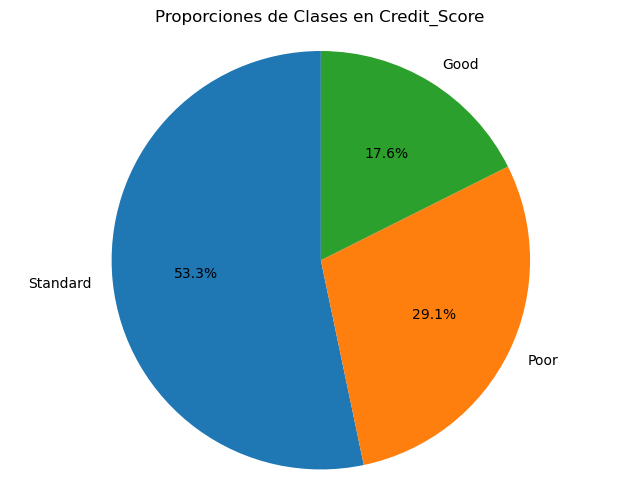

Standard    38855
Poor        21215
Good        12842
Name: Credit_Score, dtype: int64


In [130]:
# Respuesta Pregunta 4
import matplotlib.pyplot as plt

class_counts = df_limpio['Credit_Score'].value_counts()

labels = class_counts.index.astype(str)  
sizes = class_counts.values  

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proporciones de Clases en Credit_Score')
plt.axis('equal')  
plt.show()

print(class_counts)


In [131]:
# Respuesta Pregunta 5
y = df_limpio['Credit_Score'].copy().values

X = df_limpio.drop(columns=['Credit_Score']).values  


In [132]:
# Respuesta Pregunta 6

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1, stratify=y)


In [133]:
# Respuesta Pregunta 7 y 8
# 7. (0.7 puntos) Entrene 3 modelos de ``Random forest`` con los datos de entrenamiento,
# cambiando el hiperparametro de ``número de árboles``.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Dividir el conjunto de datos en entrenamiento y prueba
# Lista para almacenar los modelos y sus precisiones
models = {}
accuracies = {}

# Entrenar tres modelos de Random Forest con diferentes números de árboles
n_estimators_list = [10, 50, 100]

for n in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = model.predict(X_test)  # Predecir en el conjunto de prueba
    accuracy = accuracy_score(y_test, y_pred)  # Calcular precisión
    models[n] = model  # Almacenar el modelo
    accuracies[n] = accuracy  # Almacenar la precisión

# Mostrar las precisiones de cada modelo
for n, acc in accuracies.items():
    print(f'Precisión del Random Forest con {n} árboles: {acc:.2f}')


Precisión del Random Forest con 10 árboles: 0.70
Precisión del Random Forest con 50 árboles: 0.72
Precisión del Random Forest con 100 árboles: 0.72
